In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from ptypy import io
import os
import numpy as np
from scipy import ndimage as ndi

In [2]:
scan_number = 50738
dark_number = 50165
base_path = '/dls/i14/data/2019/cm22977-3/scan'
data_path = os.path.join(base_path, 'i14-%d.nxs' % scan_number)
dark_path = os.path.join(base_path, 'i14-%d.nxs' % dark_number)

In [3]:

# Load data
data = io.h5read(data_path)

In [4]:
# Mortor coordinates
x = data['entry1']['xreye_addetector']['stage1_x']
y = data['entry1']['xreye_addetector']['stage1_y']

In [5]:
# Raw data
d = data['entry1']['xreye_addetector']['data'].astype(float)

In [50]:
energy_keV = data['entry1']['before_scan']['dcm_enrg']['dcm_enrg']
print(energy_keV)

11.99975054812


In [7]:
# Load darks
dark_data = io.h5read(dark_path)
dark = dark_data['entry']['xreye_addetector']['data'].astype(float).mean(axis=0).mean(axis=0)

In [8]:
# Work on downsampled data
d1 = ndi.zoom(d - dark, zoom=(1, 1, .25, .25))

In [9]:
# Take care of negative values
d1[d1<0] = 0.

In [10]:
# No empty beam frame. Use median among frames
d0 = np.median(d1, (0,1))

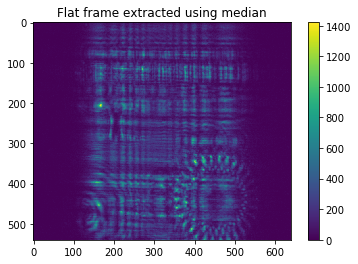

In [42]:
plt.imshow(d1[0,2])
ax = plt.gca()
ax.set_title('Flat frame extracted using median')
plt.colorbar()

In [12]:
d1a = d1.reshape((3*17, 540, 640))

In [13]:
mask = (d0>.1*d0.max())

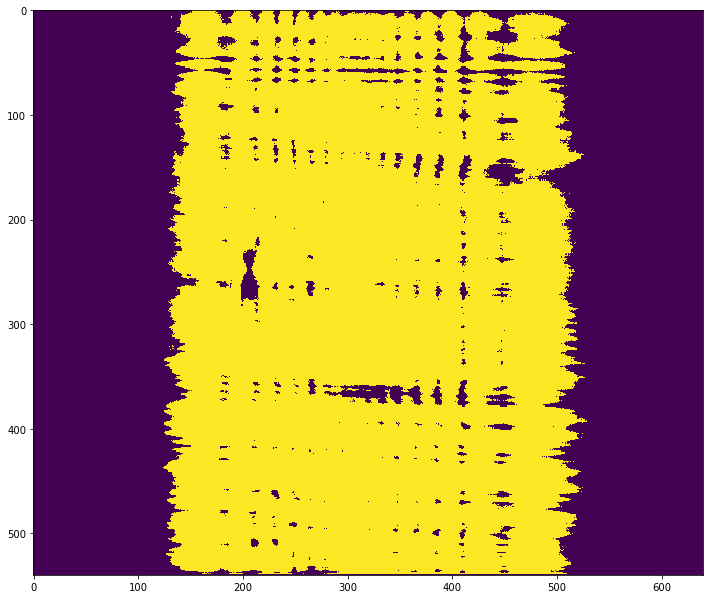

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(mask)

In [19]:
# Convert positions to pixels
xp = x.ravel()
xp -= xp[0]
px = xp * 100 / .005
yp = y.ravel()
yp -= yp[0]
py = -yp*200/ .01

In [20]:
%run stitching.py

<Figure size 432x288 with 0 Axes>

In [22]:
img, flat, positions = merge_image_stack(frames=d1a, positions=-np.array([py, px], dtype=int).T, flat=d0, mask=mask, refine_flat=False, max_iter=5, max_shift=20)

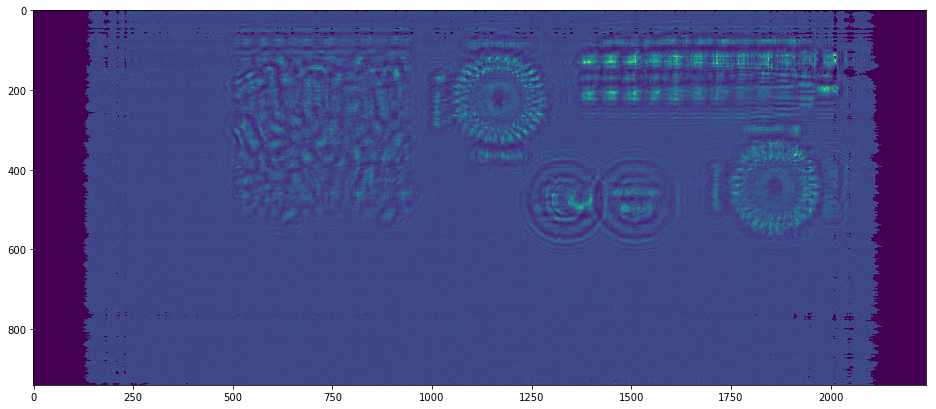

In [23]:
plt.figure(figsize=(16,8))
plt.imshow(img)

In [21]:
img0, flat0, positions0 = img, flat, positions

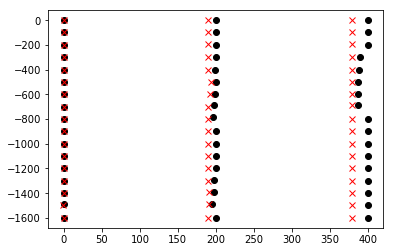

In [28]:
plt.plot(positions[:,0], positions[:,1], 'ko')
plt.plot(positions0[:,0], positions0[:,1], 'rx')


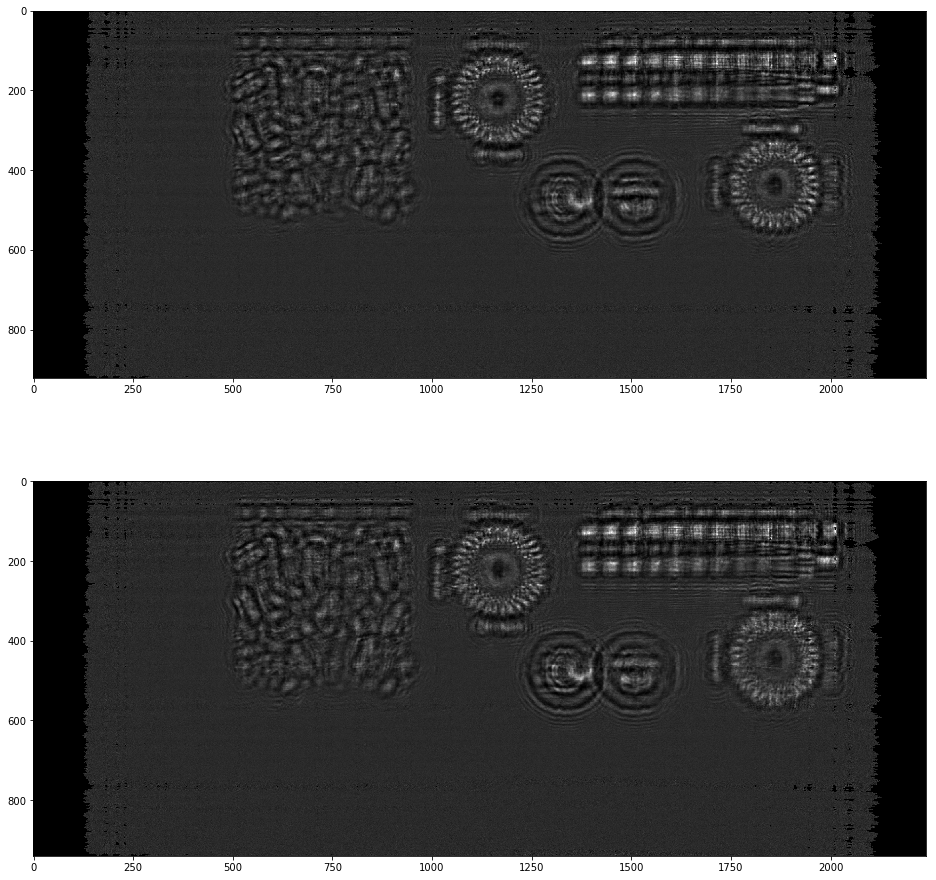

In [40]:
plt.figure(figsize=(16,16))
plt.subplot(211)
plt.imshow(img0, vmin=.4, vmax=4, cmap='gray')
plt.subplot(212)
plt.imshow(img, vmin=.4, vmax=4, cmap='gray')

In [47]:
plt.imsave('hologram_10percent.png', img0, vmin=.4, vmax=4, cmap='gray')
plt.imsave('hologram.png', img, vmin=.4, vmax=4, cmap='gray')

In [49]:
# From SEM/hologram comparison: pixel size is almost exactly 50 nm.

50.12531328320802